# Keyword Extraction and Frequency Plot

In [1]:
# Importing the required libraries.

import PyPDF2
import re
import glob
import yake
import seaborn as sns
from string import punctuation
from collections import Counter
from heapq import nlargest
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Extraction of text from PDFs and making a corpus from single NASA record.

file = "C:/Users/Madhu/OneDrive/Desktop/NTRS/CDMS_records/19690031423.pdf"
fileReader = PyPDF2.PdfFileReader(open(file, "rb"))
pdf_text = ''
count = 0
count = fileReader.numPages
while count >= 0:
    count -= 1
    pageObj = fileReader.getPage(count)
    text = pageObj.extractText()
    pdf_text = pdf_text + text
print(pdf_text)

When all the  possible  error  sources  in the experiment  are  considered,  the only error  source  that  can  affect  the  physical  measurements of the  diffraction  pattern  when the object is stationary is the  location of the  zeros on the  microdensitometer  traces. The  conclusion is that the observed  radical  changes  in  the  physical  dimensions of the diffraction  patterns are due  solely  to  object  motion. It is further  concluded  that a close correlation  exists  between  the  observed  changes  in  physical  dimensions  and  the  changes predicted by this  study.  The  purpose of this  study  was  to  establish  the  existence of the correlation;  future  studies  can,  no  doubt,  refine  the  technique  used  in  this  study. CONCLUSIONS This  study  has  shown  that  it is possible  to  use  the  in-line  Fraunhofer  scheme  to form a continuous-exposure  hologram of an  object  in  motion.  The  study  has  also given  an  expression  for  the  recorded  fringe  

In [3]:
len(pdf_text)

30038

In [4]:
# Keyword Extraction from each document using YAKE.

kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(pdf_text)
for kw in keywords:
    print(kw)

('object', 0.001875847787895608)
('object field', 0.003962740475646717)
('equation', 0.004467922480156099)
('Object velocity', 0.007257945558155297)
('object motion', 0.007651689433303184)
('experiment', 0.007664542477883537)
('object velocity object', 0.007895021738542611)
('Field', 0.00839628615548133)
('Figure', 0.009627162649544734)
('time', 0.01080093531367342)
('function', 0.013889590457665054)
('observation time', 0.014129950076589164)
('Fraunhofer holography', 0.014781400595594092)
('object field time', 0.015407559322835676)
('object geometry', 0.015411134785408122)
('velocity', 0.016522173029471388)
('Manned Spacecraft Center', 0.017286321558216397)
('Fraunhofer', 0.018179871766810653)
('Objects', 0.018289515931982178)
('experiment results', 0.01919385107004822)


<AxesSubplot:>

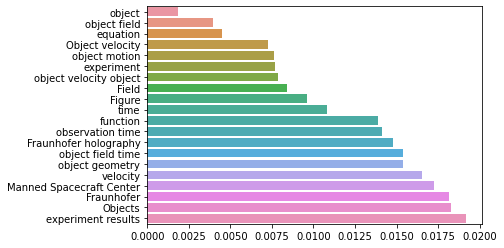

In [5]:
# Keyword Frequency plot for each document. Lower the value, higher the importance of the keyword.

X = []
y = []
for kw in keywords:
    X.append(kw[0])
    y.append(kw[1])
sns.barplot(x=y, y=X)